# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

Question 2:

2.1:
Cross Tabulation
breast_cancer_death     no   yes  Total
treatment                              
control              44405   505  44910
mammogram            44425   500  44925
Total                88830  1005  89835

Difference in 25-year survival rates between control and mammogram groups is -0.00012

2.2:


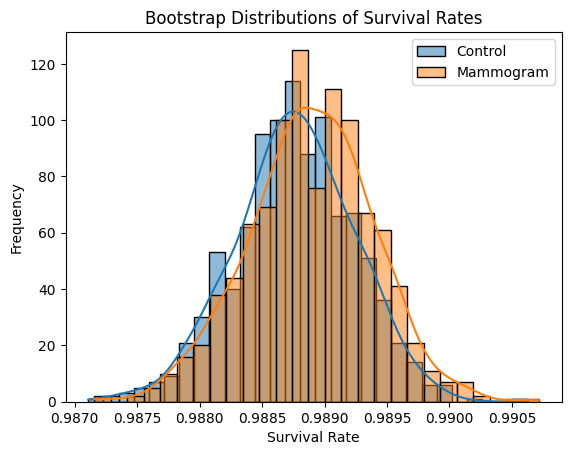

2.3:
99% Confidence Interval: [-0.00196, 0.00167]
The confidence interval does in fact include zero.

2.4
This data might over/understate the conclusions I have reached because as a result of data biases. For example, if the patients in the dataset are not a representative sample, the results may not generalizable. Selection bias may also induce the over/under estimation of the conclusions, as the way patients were entered into the dataset could introduce overall bias. With only two variables, lack of detailed patient information may cause limitations in the conclusions made.
Other data that I would like to have to better understand or criticize the results include information on other health conditions, lifestyle factors, and the stage and type of breast cancer. Such data would allow me to best access the the gathered results.

Works Cited: https://chat.openai.com/ --- Used to debug code


In [11]:
print("Question 2:")

print("\n2.1:")
import pandas as pd

df1 = pd.read_csv('mammogram.csv')
cross_tab = pd.crosstab(df1['treatment'], df1['breast_cancer_death'], margins = True, margins_name = 'Total')
print("Cross Tabulation")
print(cross_tab)

survival_rates = cross_tab['no'] / cross_tab['Total']
difference_in_survival_rates = survival_rates['control'] - survival_rates['mammogram']

print(f"\nDifference in 25-year survival rates between control and mammogram groups is {difference_in_survival_rates:.5f}")

print("\n2.2:")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_survival_rate(data):
    return np.sum(data == 'no') / len(data)

def bootstrap_sample(data, n_samples = 1000):
    bootstrap_samples = np.random.choice(data, size=(n_samples, len(data)), replace = True)
    survival_rates = np.apply_along_axis(calculate_survival_rate, axis = 1, arr = bootstrap_samples)
    return survival_rates

bootstrap_survival_control = bootstrap_sample(df1[df1['treatment'] == 'control']['breast_cancer_death'])
bootstrap_survival_mammogram = bootstrap_sample(df1[df1['treatment'] == 'mammogram']['breast_cancer_death'])

sns.histplot(bootstrap_survival_control, label = 'Control', kde = True)
sns.histplot(bootstrap_survival_mammogram, label = 'Mammogram', kde = True)
plt.title('Bootstrap Distributions of Survival Rates')
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("2.3:")
confidence_interval = np.percentile(bootstrap_survival_control - bootstrap_survival_mammogram, [0.5, 99.5])
zero_in_interval = confidence_interval[0] <= 0 <= confidence_interval[1]

print(f"99% Confidence Interval: [{confidence_interval[0]:.5f}, {confidence_interval[1]:.5f}]")
print("The confidence interval does in fact include zero.")

print("\n2.4")
print("This data might over/understate the conclusions I have reached because as a result of data biases. For example, if the patients in the dataset are not a representative sample, the results may not generalizable. Selection bias may also induce the over/under estimation of the conclusions, as the way patients were entered into the dataset could introduce overall bias. With only two variables, lack of detailed patient information may cause limitations in the conclusions made.")
print("Other data that I would like to have to better understand or criticize the results include information on other health conditions, lifestyle factors, and the stage and type of breast cancer. Such data would allow me to best access the the gathered results.")

print("\nWorks Cited: https://chat.openai.com/ --- Used to debug code")

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

Question 3:

3.1:
Cross Tabulation
outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143

3.2:
Treatment Proportion of Success:
treatment
lifestyle    0.534188
met          0.482759
rosi         0.613734
dtype: float64

The treatment that appears to be the most effective is rosi, as it has the highest treatment proportion of success.

3.3:


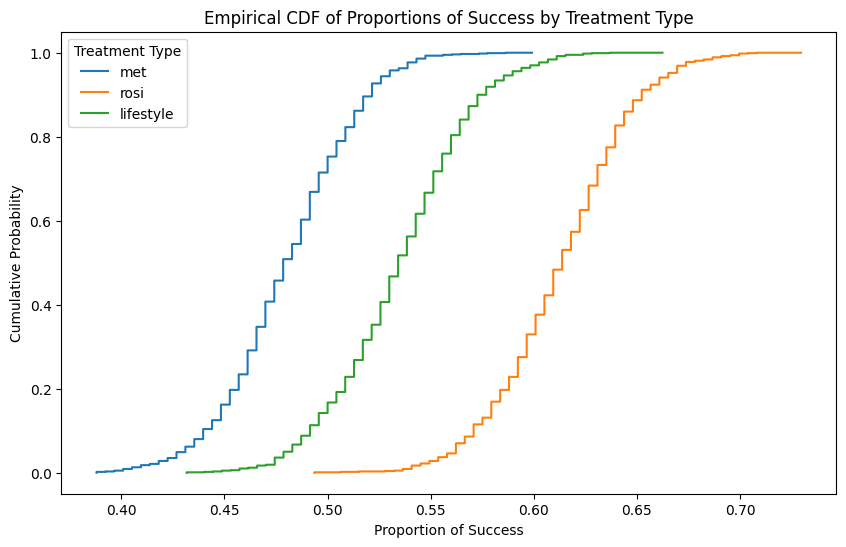

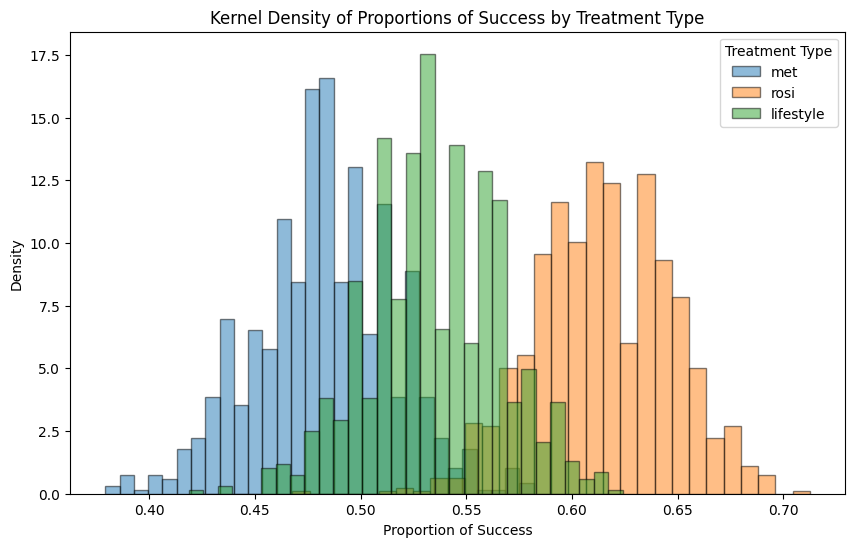

Based on the charts, rosi appers to be the most effective treatment.

3.4:

90% Confidence Level Pairwise Treatment Comparisons:
Lifestyle vs. Met: [-0.12923298  0.0214062 ], Significant: False
Met vs. Rosi: [-0.20406708 -0.0576615 ], Significant: True
Rosi vs. Lifestyle: [0.00247331 0.15652672], Significant: True

The results indicate that, at the 90% confidence level, the outcomes for the 'Met vs. Rosi' and 'Rosi vs. Lifestyle' comparisons are significantly different.

3.5:
The treatment that appears to be the most effective is rosi. This is because it has the highest treatment proportion of success, being 0.613734. This is further presented by the charts, as in both the emperical CDF and the kernel density plot, rosi appears to hold a confidence interval at higher values for proportion of success compared to the other two treatments.

Works Cited: https://chat.openai.com/ --- Used to debug code


In [12]:
print("Question 3:")

print("\n3.1:")
import pandas as pd
df2 = pd.read_csv('diabetes_hw.csv')
cross_tab2 = pd.crosstab(df2['treatment'], df2['outcome'])

print("Cross Tabulation")
print(cross_tab2)

print("\n3.2:")
proportion_success = cross_tab2['success'] / cross_tab2.sum(axis=1)

print("Treatment Proportion of Success:")
print(proportion_success)
print("\nThe treatment that appears to be the most effective is rosi, as it has the highest treatment proportion of success.")

print("\n3.3:")
def calculate_proportion_success(data):
    cross_tab = pd.crosstab(data['treatment'], data['outcome'])
    proportion_success = cross_tab['success'] / cross_tab.sum(axis = 1)
    return proportion_success.values

def bootstrap_proportions(data, num_samples = 1000):
    treatments = data['treatment'].unique()
    bootstrap_results = []

    for treatment in treatments:
        treatment_data = data[data['treatment'] == treatment]
        bootstrap_samples = []

        for value in range(num_samples):
            resample = treatment_data.sample(frac=1, replace=True)
            proportion_success = calculate_proportion_success(resample)
            bootstrap_samples.append(proportion_success)

        bootstrap_results.append((treatment, np.array(bootstrap_samples)))

    return bootstrap_results

plt.figure(figsize=(10, 6))
for treatment, samples in bootstrap_proportions(df2):
    sorted_samples = np.sort(samples.flatten())
    ecdf_values = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)
    plt.step(sorted_samples, ecdf_values, label=treatment)

plt.title('Empirical CDF of Proportions of Success by Treatment Type')
plt.xlabel('Proportion of Success')
plt.ylabel('Cumulative Probability')
plt.legend(title = 'Treatment Type')
plt.show()

plt.figure(figsize=(10, 6))
for treatment, samples in bootstrap_proportions(df2):
    flattened_samples = samples.flatten()
    plt.hist(flattened_samples, bins=30, density=True, alpha=0.5, label=treatment, edgecolor='black', linewidth=1)

plt.title('Kernel Density of Proportions of Success by Treatment Type')
plt.xlabel('Proportion of Success')
plt.ylabel('Density')
plt.legend(title = 'Treatment Type')
plt.show()

print("Based on the charts, rosi appers to be the most effective treatment.")

print("\n3.4:")
def calculate_difference(data1, data2):
    return data1 - data2

bootstrap_results_lifestyle_met = bootstrap_proportions(df2[df2['treatment'].isin(['lifestyle', 'met'])])
bootstrap_results_met_rosi = bootstrap_proportions(df2[df2['treatment'].isin(['met', 'rosi'])])
bootstrap_results_rosi_lifestyle = bootstrap_proportions(df2[df2['treatment'].isin(['rosi', 'lifestyle'])])

difference_lifestyle_met = calculate_difference(bootstrap_results_lifestyle_met[0][1][:, 0], bootstrap_results_lifestyle_met[1][1][:, 0])
difference_met_rosi = calculate_difference(bootstrap_results_met_rosi[0][1][:, 0], bootstrap_results_met_rosi[1][1][:, 0])
difference_rosi_lifestyle = calculate_difference(bootstrap_results_rosi_lifestyle[0][1][:, 0], bootstrap_results_rosi_lifestyle[1][1][:, 0])

confidence_interval_lifestyle_met = np.percentile(difference_lifestyle_met, [5, 95])
confidence_interval_met_rosi = np.percentile(difference_met_rosi, [5, 95])
confidence_interval_rosi_lifestyle = np.percentile(difference_rosi_lifestyle, [5, 95])

significant_lifestyle_met = confidence_interval_lifestyle_met[0] > 0 or confidence_interval_lifestyle_met[1] < 0
significant_met_rosi = confidence_interval_met_rosi[0] > 0 or confidence_interval_met_rosi[1] < 0
significant_rosi_lifestyle = confidence_interval_rosi_lifestyle[0] > 0 or confidence_interval_rosi_lifestyle[1] < 0

print("\n90% Confidence Level Pairwise Treatment Comparisons:")
print(f"Lifestyle vs. Met: {confidence_interval_lifestyle_met}, Significant: {significant_lifestyle_met}")
print(f"Met vs. Rosi: {confidence_interval_met_rosi}, Significant: {significant_met_rosi}")
print(f"Rosi vs. Lifestyle: {confidence_interval_rosi_lifestyle}, Significant: {significant_rosi_lifestyle}")

print("\nThe results indicate that, at the 90% confidence level, the outcomes for the 'Met vs. Rosi' and 'Rosi vs. Lifestyle' comparisons are significantly different.")

print("\n3.5:")
print("The treatment that appears to be the most effective is rosi. This is because it has the highest treatment proportion of success, being 0.613734. This is further presented by the charts, as in both the emperical CDF and the kernel density plot, rosi appears to hold a confidence interval at higher values for proportion of success compared to the other two treatments.")

print("\nWorks Cited: https://chat.openai.com/ --- Used to debug code")

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.